# Chasing in ASD & Control adolescents (Spring 2016)

##### Researchers: Steven Vanmarcke, Sander Van de Cruys, Pieter Moors, Johan Wagemans
___


Replication & extension of : 

> Gao, T., Newman, G. E., & Scholl, B. J. (2009). The psychophysics of chasing: A case study in the perception of animacy. Cognitive Psychology, 59(2), 154–179.

Key questions:

- *Does chasing subtlety influence chase detection (in TD adolescents), consistent with Gao & Scholl (2009)? (replication)*
- *Do people readily use additional informative cues in this task? Do people preferentially use the social cues?*
- *Can we find general impairments in performance in ASD on this allegedly social task, consistent with their everyday social problems?*
- *Do individuals with ASD make use of social cues to the same extent as adolescents without TD? Are adolescents with ASD more sensitive to subtle non-social cues, consistent with reports of enhanced detail-oriented processing in ASD?* 

Notes: 

* All errorbars are **95% CIs**
* Baseline condition only has chasing subtlety manipulation, 
* Eyes condition ("social cue") has an added orientation cue of superimposed eyes (wolf consistently following sheep)
* Frequency condition ("non social cue") has chasing subtlety and a sinusoidal manipulation of color (wolf and sheep in sync).
* Participant's age and SRS score (social responsiveness scale) are important covariates


In [1]:
import numpy as np
import pandas as pd
import csv, json

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.regression.mixed_linear_model import MixedLM

%pylab inline
sns.set(style="whitegrid", color_codes=True)
sns.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Import data and add condition variable (by combining eyes/frequency/baseline)

In [2]:
df = pd.read_excel("Chasing_results_acc_final.xls")

df["condition"]= 'baseline'
df['condition'][(df['eyes'] == 1)] = "eyes"
df['condition'][(df['frequency'] == 1)] = "frequency"


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
# Inspect data(types)

print(df.dtypes)
df.head()

Group                       object
subjectID                    int64
eyes                         int64
frequency                    int64
superBlockNumber             int64
blockNumber                  int64
key                          int64
trialType                   object
chasingSubtlety              int64
acc                          int64
quadrant chosen correct    float64
Order                        int64
Age                          int64
Gender                      object
Visual Acuity              float64
Log(Visual acuity)         float64
TIQ                        float64
VIQ                          int64
PIQ                          int64
SRS_overall                  int64
SRS_consciousness            int64
SRS_Cognition                int64
SRS_Communication            int64
SRS_Motivation               int64
SRS_Preoccupation            int64
condition                   object
dtype: object


,Group,subjectID,eyes,frequency,superBlockNumber,blockNumber,key,trialType,chasingSubtlety,acc,...,TIQ,VIQ,PIQ,SRS_overall,SRS_consciousness,SRS_Cognition,SRS_Communication,SRS_Motivation,SRS_Preoccupation,condition
0,TD,102,0,0,0,1,0,wolf and sheep,75,1,...,107,97,117,37,37,41,37,38,45,baseline
1,TD,102,0,0,0,1,1,wolf without sheep,15,0,...,107,97,117,37,37,41,37,38,45,baseline
2,TD,102,0,0,0,1,2,wolf and sheep,45,0,...,107,97,117,37,37,41,37,38,45,baseline
3,TD,102,0,0,0,1,3,wolf and sheep,75,0,...,107,97,117,37,37,41,37,38,45,baseline
4,TD,102,0,0,0,1,4,wolf without sheep,75,1,...,107,97,117,37,37,41,37,38,45,baseline


## Plotting mean accuracy in multiple ways

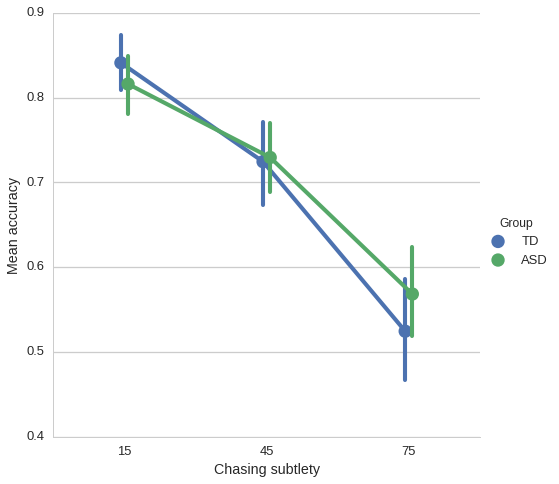

In [20]:

sns.set_style('ticks')
sns.set_style("whitegrid")

sns.factorplot(x="chasingSubtlety", y="acc", hue="Group", units="subjectID", data=df, dodge=True, kind="point", size=7, aspect=1);
sns.axlabel("Chasing subtlety", "Mean accuracy")


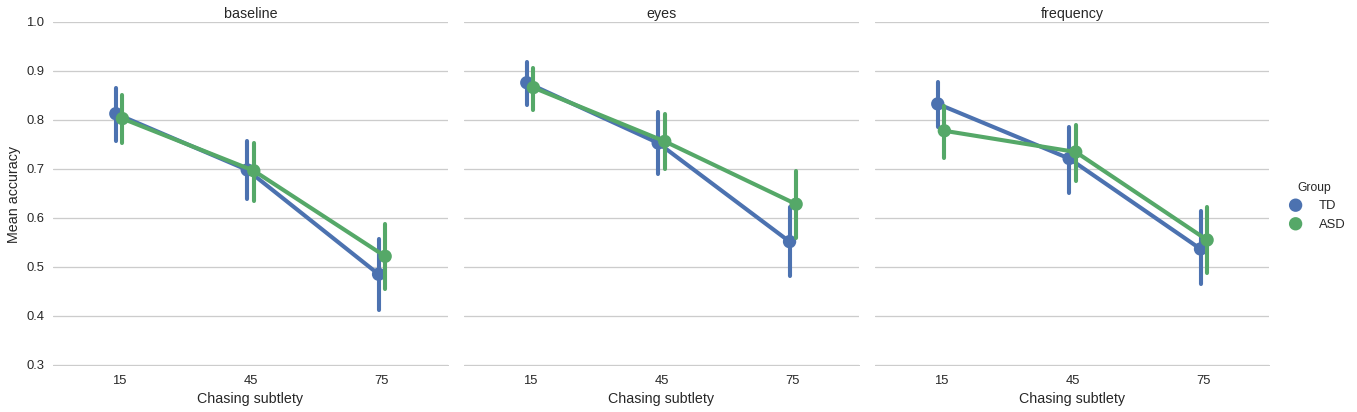

In [21]:
g = sns.factorplot(x="chasingSubtlety", y="acc", hue="Group", units="subjectID", \
                   col="condition", data=df, size=6,dodge=True, kind="point");
(g.set_axis_labels("Chasing subtlety", "Mean accuracy")
     .set_titles("{col_name}")
     .despine(left=True))

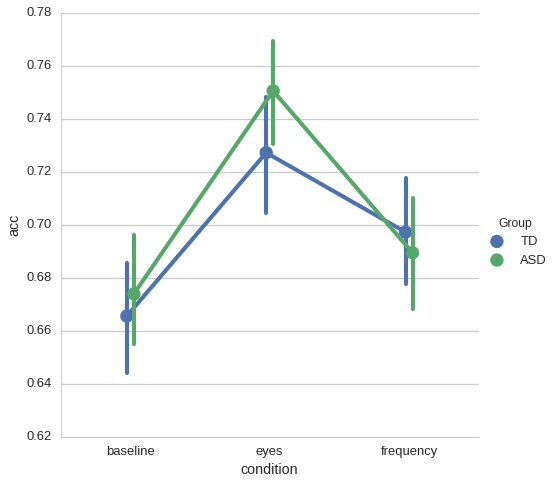

In [29]:
sns.factorplot(x="condition", y="acc", hue="Group", dodge=True, data=df, size=7, kind="point");


In [42]:
#means by subtlety
dfsumS = df.groupby(['subjectID', 'chasingSubtlety', 'Group']).mean()
dfsumS = dfsumS.reset_index()
dfsumS.head()

#means by condition
dfsumC = df.groupby(['subjectID', 'condition', 'Group']).mean()
dfsumC = dfsumC.reset_index()
dfsumC.head()

,subjectID,condition,Group,eyes,frequency,superBlockNumber,blockNumber,key,chasingSubtlety,acc,...,Log(Visual acuity),TIQ,VIQ,PIQ,SRS_overall,SRS_consciousness,SRS_Cognition,SRS_Communication,SRS_Motivation,SRS_Preoccupation
0,101,baseline,TD,0,0,0,1,37,45,0.706667,...,-0.26,91.5,103,80,53,57,48,53,57,48
1,101,eyes,TD,1,0,1,1,37,45,0.773333,...,-0.26,91.5,103,80,53,57,48,53,57,48
2,101,frequency,TD,0,1,2,1,37,45,0.746667,...,-0.26,91.5,103,80,53,57,48,53,57,48
3,102,baseline,TD,0,0,0,1,37,45,0.466667,...,-0.18,107.0,97,117,37,37,41,37,38,45
4,102,eyes,TD,1,0,1,1,37,45,0.560000,...,-0.18,107.0,97,117,37,37,41,37,38,45


### Distributional information

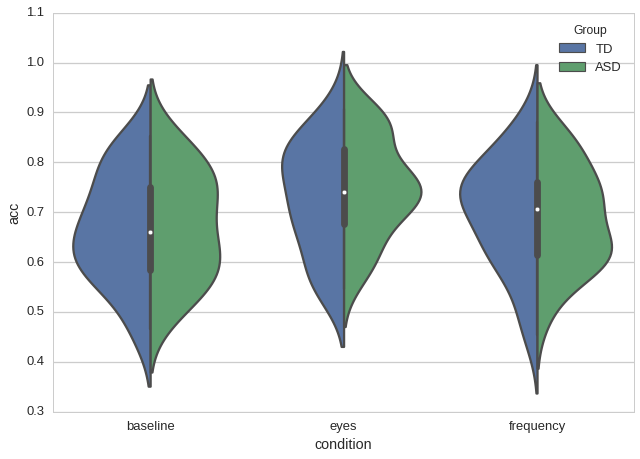

In [54]:
sns.violinplot(x="condition", y="acc", hue="Group", split=True, data=dfsumC);


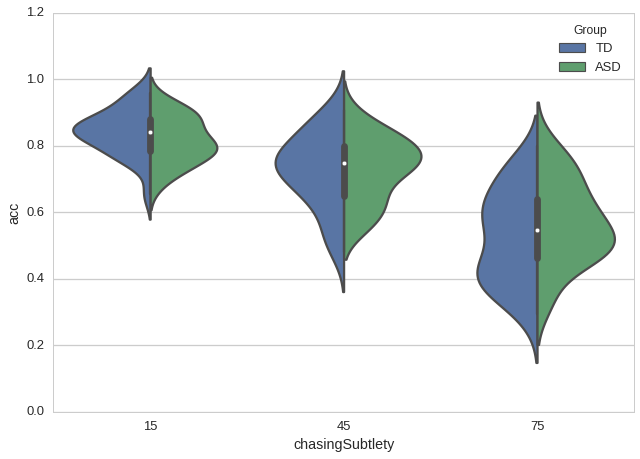

In [64]:
sns.violinplot(x="chasingSubtlety", y="acc", hue="Group", split=True, data=dfsumS);


## Does SRS score influence performance? (Yes but only in ASD group)

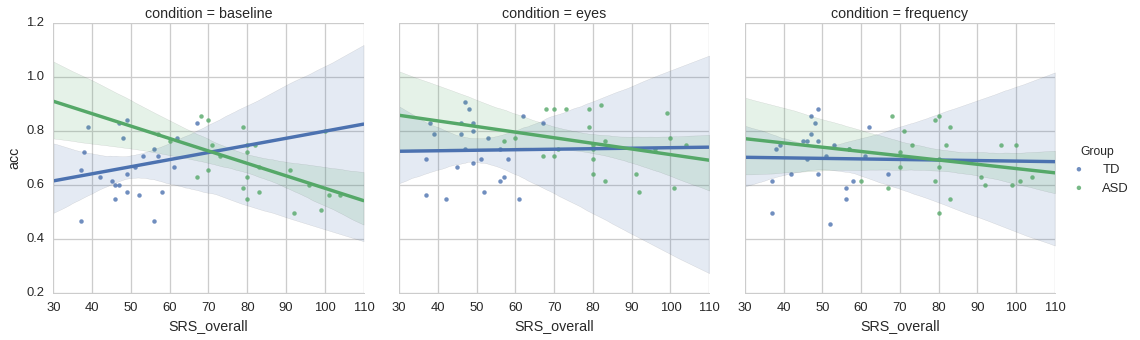

In [109]:
sns.lmplot(x="SRS_overall", y="acc", hue="Group", col="condition", data=dfsumC);

###  Groups separately, only baseline

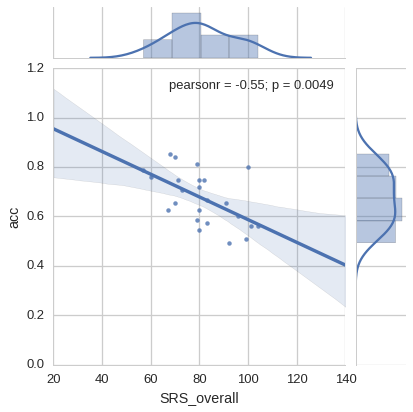

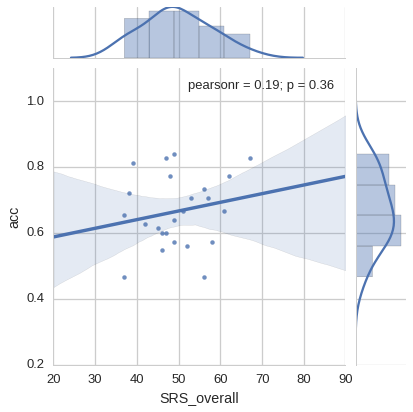

In [127]:
sns.jointplot(x="SRS_overall", y="acc", \
              data=dfsum[(dfsumC['Group']=='ASD') & (dfsumC['condition']=='baseline')], kind="reg");
sns.jointplot(x="SRS_overall", y="acc", \
              data=dfsum[(dfsumC['Group']=='TD') & (dfsumC['condition']=='baseline')], kind="reg");


## Does IQ influence performance? (No, same for TIQ/VIQ)

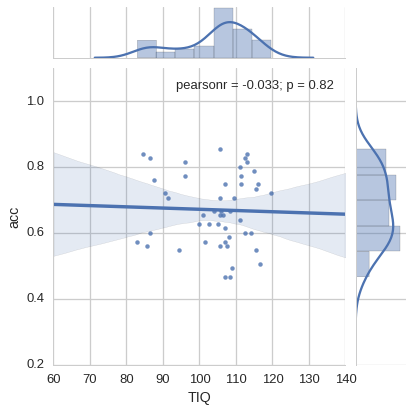

In [48]:
sns.jointplot(x="TIQ", y="acc", data=dfsumC[dfsumC['condition']=='baseline'], kind="reg");

## Does age influence performance? (Yes, similarly in all groups/conditions)

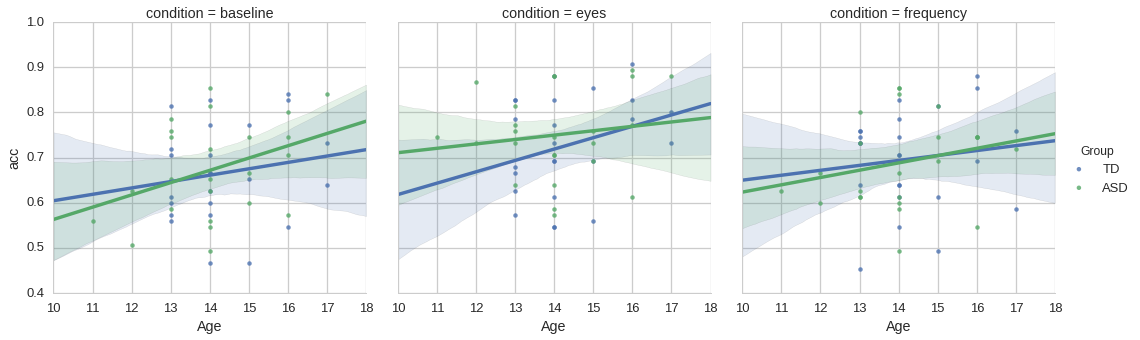

In [82]:
sns.lmplot(x="Age", y="acc", hue="Group", col="condition", data=dfsum);

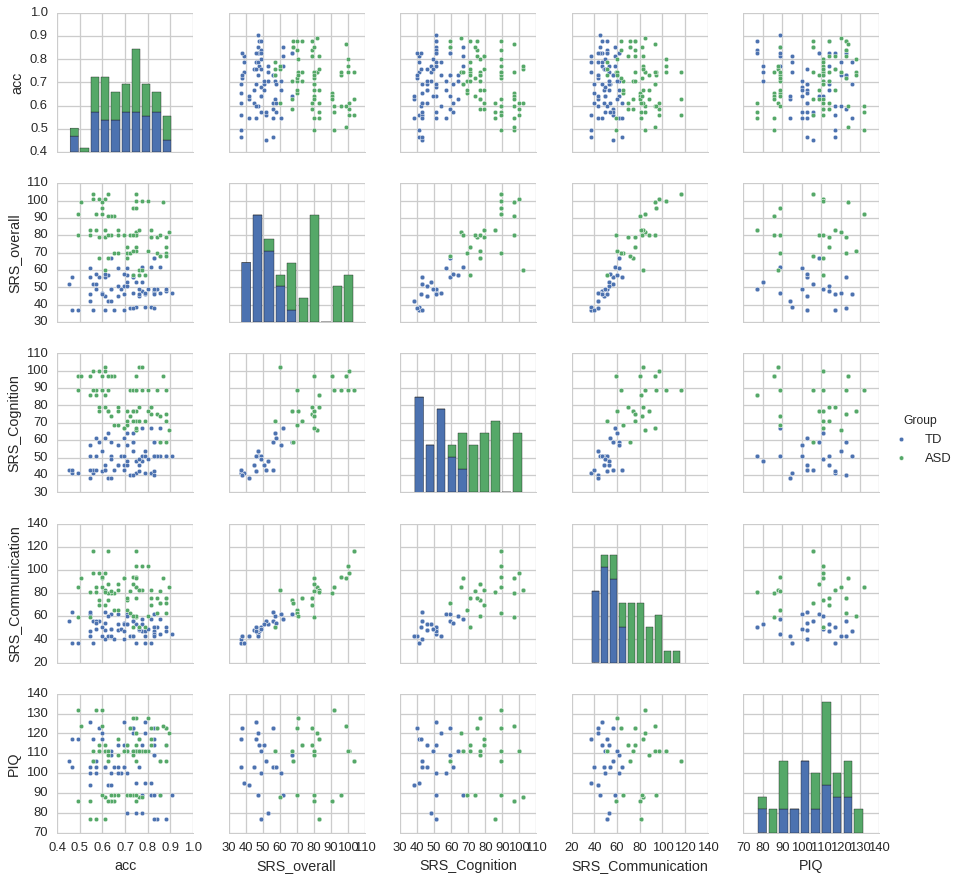

In [102]:
sns.pairplot(dfsum.loc[:, ["acc","Group", "SRS_overall", "SRS_Cognition", "SRS_Communication", "PIQ"]], hue="Group")



# GEE test (Generalized Estimating Equations)



### References:

- [GEE example in python](http://nbviewer.jupyter.org/urls/umich.box.com/shared/static/zyl08wsmxwoh6ts70v4o.ipynb) (more [here](https://github.com/statsmodels/statsmodels/wiki/Examples))
- McNeish, D., Stapleton, L. M., & Silverman, R. D. (2016). [On the Unnecessary Ubiquity of Hierarchical Linear Modeling](https://drive.google.com/open?id=0BwlD7q-DXkdWWXRWRG5YZUZ1elU). Psychological Methods. http://doi.org/10.1037/met0000078
- [What is the difference between generalized estimating equations and GLMM?](http://stats.stackexchange.com/questions/17331/what-is-the-difference-between-generalized-estimating-equations-and-glmm)


In [71]:
# model formulation
fml = "acc ~ Age + trialType + condition * Group * chasingSubtlety + SRS_overall:Group + SRS_overall:Group:condition"


# covariance structure
ex = sm.cov_struct.Exchangeable()
#link fu
fa = sm.families.Binomial(sm.families.links.logit)

model = sm.GEE.from_formula(fml, "subjectID", df, cov_struct=ex, family=fa)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                         acc   No. Observations:                10800
Model:                                 GEE   No. clusters:                       48
Method:                        Generalized   Min. cluster size:                 225
                      Estimating Equations   Max. cluster size:                 225
Family:                           Binomial   Mean cluster size:               225.0
Dependence structure:         Exchangeable   Num. iterations:                    12
Date:                     Mon, 13 Jun 2016   Scale:                           1.052
Covariance type:                    robust   Time:                         20:13:04
                                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------
Interc

In [72]:
# added Age*chasingSubtlety interaction

fmlExt = "acc ~ Age + trialType + condition * Group * chasingSubtlety \
+ SRS_overall:Group + SRS_overall:Group:condition + Age:chasingSubtlety"

# covariance structure
ex = sm.cov_struct.Exchangeable()
#link fu
fa = sm.families.Binomial(sm.families.links.logit)

model = sm.GEE.from_formula(fmlExt, "subjectID", df, cov_struct=ex, family=fa)
result = model.fit()
print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                         acc   No. Observations:                10800
Model:                                 GEE   No. clusters:                       48
Method:                        Generalized   Min. cluster size:                 225
                      Estimating Equations   Max. cluster size:                 225
Family:                           Binomial   Mean cluster size:               225.0
Dependence structure:         Exchangeable   Num. iterations:                    15
Date:                     Tue, 14 Jun 2016   Scale:                           1.058
Covariance type:                    robust   Time:                         01:14:50
                                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------
Interc